In [1]:
import pandas as pd  
from sklearn import tree
import collections
import pydotplus
from IPython import display
from random import shuffle

In [2]:
df = pd.read_csv('lab-3/genes-leukemia.csv')

# приберемо з датафрейму "не потрібні колонки"
df.drop(columns=["SNUM", "Gender", "Source", "BM_PB", "Year", "pct_Blasts", "Treatment_Response", "PS", "TB_if_ALL", "FAB_if_AML"], inplace=True)
df.head()

,CLASS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,...,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,ALL,75,556,2018,610,193,571,178,654,835,...,257,1595,2911,601,358,289,337,1320,397,1582
1,ALL,129,476,650,927,31,2893,336,1283,3072,...,46,822,575,435,82,288,131,898,20,624
2,ALL,44,498,573,1697,198,2723,345,1286,609,...,139,1452,905,547,263,447,529,597,183,753
3,ALL,218,1211,2291,425,91,731,374,915,935,...,168,654,2038,472,218,424,422,1644,363,743
4,ALL,110,820,2796,529,194,649,321,732,1665,...,94,1011,1871,661,186,364,354,1322,251,626


In [3]:
data = []
for i in df.itertuples(index=False, name=None):
    data.append({ 'category':i[0], 'labels':i[1:] })


# 80% усього датасету іде на тренування
training_set = .8 
shuffle(data)

training_set_limit = int(len(data) * training_set)

# Labels& Categories

### дані для тренування
train_labels   = [item['labels'] for key, item in enumerate(data) if key < training_set_limit]
train_category = [item['category'] for key, item in enumerate(data) if key < training_set_limit]

### тестові данні
test_labels   = [item['labels'] for key, item in enumerate(data) if key >= training_set_limit]
test_category = [item['category'] for key, item in enumerate(data) if key >= training_set_limit]

In [4]:
# дерефо класифікацій
clf = tree.DecisionTreeClassifier()  
clf = clf.fit(train_labels, train_category)

In [5]:
print( "  Trial ## | RESULT | CATEGORY_RETURNED | CATEGORY_EXPECTED |" )
print( "-"*61 )
failed = 0
predictions = clf.predict(test_labels)
for key, result in enumerate(predictions):
    match = True if result == test_category[key] else False
    tic = (">", " ")[match]
    print( "{} Trial {:0>2} | {:<7}|{:^19}|{:^19}|".format(tic, key, str(match), result, test_category[key]) )
    if not match:
        failed += 1

print()

report = (
    100 - (failed/len(predictions))*100, # Percent of OK Predictions
    len(predictions),                    # Total of Predictions 
    failed,                              # Failed Predictions
)

print("Efficiency{:10.2f}%\nTotal{:>15d}\nFailed{:>14d}".format(*report))

  Trial ## | RESULT | CATEGORY_RETURNED | CATEGORY_EXPECTED |
-------------------------------------------------------------
  Trial 00 | True   |        AML        |        AML        |
  Trial 01 | True   |        ALL        |        ALL        |
  Trial 02 | True   |        AML        |        AML        |
  Trial 03 | True   |        ALL        |        ALL        |
  Trial 04 | True   |        AML        |        AML        |
  Trial 05 | True   |        ALL        |        ALL        |
  Trial 06 | True   |        ALL        |        ALL        |
  Trial 07 | True   |        AML        |        AML        |
  Trial 08 | True   |        AML        |        AML        |
  Trial 09 | True   |        ALL        |        ALL        |
  Trial 10 | True   |        ALL        |        ALL        |
  Trial 11 | True   |        AML        |        AML        |
  Trial 12 | True   |        AML        |        AML        |
  Trial 13 | True   |        ALL        |        ALL        |
  Trial 

Visualize Decision Tree


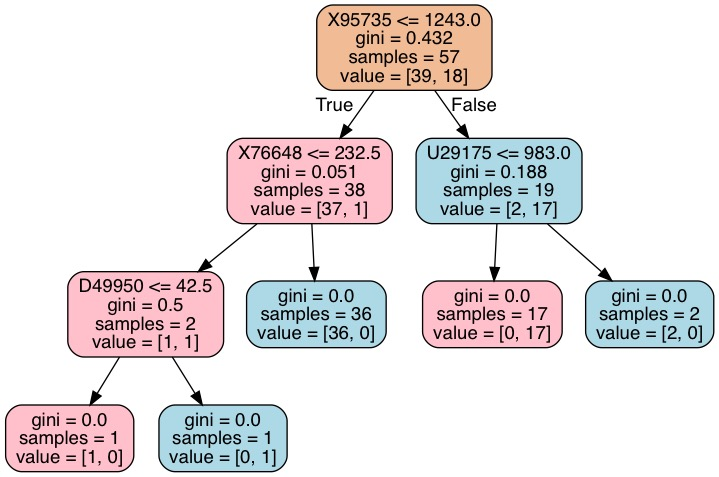

In [6]:
dot_data = tree.export_graphviz(clf, feature_names=df.columns.values[1:], out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('pink', 'lightblue')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
print("Visualize Decision Tree")
display.Image(graph.create_jpeg())